In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# plt.rcParams['font.size'] = 16

In [4]:
ft_noimage = pd.read_csv("preds/llava-v1.5-7b-vflute-v2-noimage-lora_checkpoint-144/f1_res/byDataset_f1_at_thresh.csv")
ft_noimage['model_name'] = 'LLaVA-NoImage'
ft_vflute = pd.read_csv("preds/llava-v1.5-7b-vflute-v2-lora_checkpoint-144/f1_res/byDataset_f1_at_thresh.csv")
ft_vflute['model_name'] = 'LLaVA-VF'
ft_evil = pd.read_csv("preds/llava-v1.5-7b-evil-v2-lora_checkpoint-4310/f1_res/byDataset_f1_at_thresh.csv")
ft_evil['model_name'] = 'LLaVA-eViL'
ft_evil_vflute = pd.read_csv("preds/llava-v1.5-7b-evil-vflute-v2-lora_checkpoint-4380/f1_res/byDataset_f1_at_thresh.csv")
ft_evil_vflute['model_name'] = 'LLaVA-eViL+VF'
zs7b = pd.read_csv("preds/llava-v1.6-mistral-7b/f1_res/byDataset_f1_at_thresh.csv")
zs7b['model_name'] = 'LLaVA-7B'
zs7b_sg = pd.read_csv("preds/llava-v1.6-mistral-7b_sg/f1_res/byDataset_f1_at_thresh.csv")
zs7b_sg['model_name'] = 'LLaVA-7B-SG'
zs34b = pd.read_csv("preds/llava-v1.6-34b/f1_res/byDataset_f1_at_thresh.csv")
zs34b['model_name'] = 'LLaVA-34B'
zs34b_sg = pd.read_csv("preds/llava-v1.6-34b_sg/f1_res/byDataset_f1_at_thresh.csv")
zs34b_sg['model_name'] = 'LLaVA-34B-SG'

gpt4_zs = pd.read_csv("preds/gpt4/f1_res_zs/byDataset_f1_at_thresh.csv")
gpt4_zs['model_name'] = 'GPT-4'
gpt4_fs5 = pd.read_csv("preds/gpt4/f1_res_fs5/byDataset_f1_at_thresh.csv")
gpt4_fs5['model_name'] = 'GPT-4-FS5'
gpt4_fs10 = pd.read_csv("preds/gpt4/f1_res_fs10/byDataset_f1_at_thresh.csv")
gpt4_fs10['model_name'] = 'GPT-4-FS10'

claude_zs = pd.read_csv("preds/claude/f1_res_zs/byDataset_f1_at_thresh.csv")
claude_zs['model_name'] = 'Claude'
claude_fs5 = pd.read_csv("preds/claude/f1_res_fs5/byDataset_f1_at_thresh.csv")
claude_fs5['model_name'] = 'Claude-FS5'
claude_fs10 = pd.read_csv("preds/claude/f1_res_fs10/byDataset_f1_at_thresh.csv")
claude_fs10['model_name'] = 'Claude-FS10'

gemini_zs = pd.read_csv("preds/gemini/f1_res_zs/byDataset_f1_at_thresh.csv")
gemini_zs['model_name'] = 'Gemini'
gemini_fs5 = pd.read_csv("preds/gemini/f1_res_fs5/byDataset_f1_at_thresh.csv")
gemini_fs5['model_name'] = 'Gemini-FS5'
gemini_fs10 = pd.read_csv("preds/gemini/f1_res_fs10/byDataset_f1_at_thresh.csv")
gemini_fs10['model_name'] = 'Gemini-FS10'

In [7]:
overall_df = pd.concat([ft_noimage, ft_vflute, ft_evil, ft_evil_vflute, 
                        zs7b, zs7b_sg, zs34b, zs34b_sg, 
                         gemini_zs, gemini_fs5, gemini_fs10,
                         gpt4_zs, gpt4_fs5, gpt4_fs10,
                         claude_zs, claude_fs5, claude_fs10
                         ], ignore_index=True)
# overall_df = overall_df[overall_df['threshold'].isin([0, 0.45, 0.5, 0.55, 0.6, 0.7])]
overall_df = overall_df[overall_df['threshold'].isin([0, 0.45, 0.5, 0.53, 0.55, 0.6, 0.7])]
overall_df = overall_df[overall_df['dataset'] == "overall"]
overall_df['model_name'] = overall_df['model_name'].str.replace("LLaVA-", "")
overall_df.to_csv("tables/overall_f1_at_thresh.csv", index=False)

In [8]:
model_categories = {
    "Fine-tuned": ["eViL", "eViL+VF", "VF", "NoImage"],
    "Off-the-shelf-Open": ["7B", "7B-SG", "34B", "34B-SG"],
    "Off-the-shelf-API-based": ["Gemini", "Gemini-FS5", "Gemini-FS10",
                                "GPT-4", "GPT-4-FS5", "GPT-4-FS10",
                                "Claude", "Claude-FS5", "Claude-FS10"]
    }
# Function to determine the model's category
def get_model_category(model):
    for category, models in model_categories.items():
        if model in models:
            return category
    return None

def find_f1_score(model, threshold):
    category = get_model_category(model)
    # print(category)
    score_row = overall_df[(overall_df['model_name'] == model) & (overall_df['threshold'] == threshold)]
    
    if score_row.empty:
        return ""
    
    score = score_row.iloc[0]['f1'] * 100
    formatted_score = f"{score:.2f}"
    
    # Check if this score is the highest in its category for this threshold
    category_models = model_categories[category]
    # print(category_models)
    highest_in_category = score == overall_df[(overall_df['model_name'].isin(category_models)) & (overall_df['threshold'] == threshold)]['f1'].max() * 100
    # print(category_models)
    # print(overall_df[(overall_df['model_name'].isin(category_models)) & (overall_df['threshold'] == threshold)]['f1'].max() * 100)
    # Check if this score is the highest overall for this threshold
    highest_overall = score == overall_df[overall_df['threshold'] == threshold]['f1'].max() * 100

    if highest_overall:
        formatted_score = f"\\textbf{{{formatted_score}}}"
    if highest_in_category:
        formatted_score = f"\\underline{{{formatted_score}}}"
    return formatted_score

# LaTeX table template with dynamic insertion of F1 scores
# f1_threshs = [0, 0.5, 0.6, 0.7]
# f1_threshs = [0, 0.5, 0.6]
f1_threshs = [0, 0.53, 0.6]
# f1_threshs = [0, 0.45, 0.5]
if len(f1_threshs) == 3:
    latex_table_template = f"""
        \\begin{{tabular}}{{lccc}}
        \\toprule
        Model Name & F1@{int(f1_threshs[0]*100)} & F1@{int(f1_threshs[1]*100)} & F1@{int(f1_threshs[2]*100)} \\\\
        \\midrule
        \\textit{{Random}} & 49.82 & - & - \\\\
        \\midrule
        \\midrule
        \\multicolumn{{4}}{{l}}{{\\textit{{Fine-tuned}}}} \\\\
        LLaVA-7B & & & \\\\
        $\\dashrightarrow$ VF & {find_f1_score("VF", f1_threshs[0])} & {find_f1_score("VF", f1_threshs[1])} & {find_f1_score("VF", f1_threshs[2])} \\\\
        \myquad $\dashrightarrow$ $-$ Image & {find_f1_score("NoImage", f1_threshs[0])} & {find_f1_score("NoImage", f1_threshs[1])} & {find_f1_score("NoImage", f1_threshs[2])} \\\\
        $\\dashrightarrow$ eViL & {find_f1_score("eViL", f1_threshs[0])} & {find_f1_score("eViL", f1_threshs[1])} & {find_f1_score("eViL", f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ $+$ VF & {find_f1_score("eViL+VF", f1_threshs[0])} & {find_f1_score("eViL+VF", f1_threshs[1])} & {find_f1_score("eViL+VF", f1_threshs[2])} \\\\
        \\midrule
        \\midrule
        \\multicolumn{{4}}{{l}}{{\\textit{{Off-the-shelf}}}} \\\\
        \\multicolumn{{4}}{{l}}{{\\underline{{\\textit{{Open}}}}}} \\\\
        LLaVA-ZS & & & \\\\
        $\\dashrightarrow$ 7B & {find_f1_score("7B",f1_threshs[0])} & {find_f1_score("7B",f1_threshs[1])} & {find_f1_score("7B",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ $+$ SG & {find_f1_score("7B-SG",f1_threshs[0])} & {find_f1_score("7B-SG",f1_threshs[1])} & {find_f1_score("7B-SG",f1_threshs[2])} \\\\
        $\\dashrightarrow$ 34B & {find_f1_score("34B",f1_threshs[0])} & {find_f1_score("34B",f1_threshs[1])} & {find_f1_score("34B",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ $+$ SG & {find_f1_score("34B-SG",f1_threshs[0])} & {find_f1_score("34B-SG",f1_threshs[1])} & {find_f1_score("34B-SG",f1_threshs[2])} \\\\
        \\midrule
        \\multicolumn{{4}}{{l}}{{\\underline{{\\textit{{API-based}}}}}} \\\\
        $\\dashrightarrow$ Gemini & {find_f1_score("Gemini",f1_threshs[0])} & {find_f1_score("Gemini",f1_threshs[1])} & {find_f1_score("Gemini",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ 5-shot & {find_f1_score("Gemini-FS5",f1_threshs[0])} & {find_f1_score("Gemini-FS5",f1_threshs[1])} & {find_f1_score("Gemini-FS5",f1_threshs[2])}  \\\\
        \myquad $\\dashrightarrow$ 10-shot & {find_f1_score("Gemini-FS10",f1_threshs[0])} & {find_f1_score("Gemini-FS10",f1_threshs[1])} & {find_f1_score("Gemini-FS10",f1_threshs[2])} \\\\
        $\\dashrightarrow$ Claude & {find_f1_score("Claude",f1_threshs[0])} & {find_f1_score("Claude",f1_threshs[1])} & {find_f1_score("Claude",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ 5-shot & {find_f1_score("Claude-FS5",f1_threshs[0])} & {find_f1_score("Claude-FS5",f1_threshs[1])} & {find_f1_score("Claude-FS5",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ 10-shot & {find_f1_score("Claude-FS10",f1_threshs[0])} & {find_f1_score("Claude-FS10",f1_threshs[1])} & {find_f1_score("Claude-FS10",f1_threshs[2])} \\\\
        $\\dashrightarrow$ GPT-4 & {find_f1_score("GPT-4",f1_threshs[0])} & {find_f1_score("GPT-4",f1_threshs[1])} & {find_f1_score("GPT-4",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ 5-shot & {find_f1_score("GPT-4-FS5",f1_threshs[0])} & {find_f1_score("GPT-4-FS5",f1_threshs[1])} & {find_f1_score("GPT-4-FS5",f1_threshs[2])} \\\\
        \myquad $\\dashrightarrow$ 10-shot & {find_f1_score("GPT-4-FS10",f1_threshs[0])} & {find_f1_score("GPT-4-FS10",f1_threshs[1])} & {find_f1_score("GPT-4-FS10",f1_threshs[2])} \\\\
        \\bottomrule
        \\end{{tabular}}
    """
elif len(f1_threshs) == 4:
    latex_table_template = f"""
        \\begin{{tabular}}{{lcccc}}
        \\toprule
        Model Name & F1@{int(f1_threshs[0]*100)} & @{int(f1_threshs[1]*100)} & @{int(f1_threshs[2]*100)} & @{int(f1_threshs[3]*100)} \\\\
        \\midrule
        \\multicolumn{{5}}{{l}}{{\\textit{{Fine-tuned}}}} \\\\
        LLaVA-7B & & & & \\\\
        $\\dashrightarrow$ eViL & {find_f1_score("eViL", f1_threshs[0])} & {find_f1_score("eViL", f1_threshs[1])} & {find_f1_score("eViL", f1_threshs[2])} & {find_f1_score("eViL", f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ +VF & {find_f1_score("eViL+VF", f1_threshs[0])} & {find_f1_score("eViL+VF", f1_threshs[1])} & {find_f1_score("eViL+VF", f1_threshs[2])} & {find_f1_score("eViL+VF", f1_threshs[3])} \\\\
        $\\dashrightarrow$ VF & {find_f1_score("VF", f1_threshs[0])} & {find_f1_score("VF", f1_threshs[1])} & {find_f1_score("VF", f1_threshs[2])} & {find_f1_score("VF", f1_threshs[3])} \\\\
        \\midrule
        \\midrule
        \\multicolumn{{5}}{{l}}{{\\textit{{Off-the-shelf}}}} \\\\
        \\multicolumn{{5}}{{l}}{{\\underline{{\\textit{{Open}}}}}} \\\\
        LLaVA-ZS & & & & \\\\
        $\\dashrightarrow$ 7B & {find_f1_score("7B",f1_threshs[0])} & {find_f1_score("7B",f1_threshs[1])} & {find_f1_score("7B",f1_threshs[2])} & {find_f1_score("7B",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ +CoT & {find_f1_score("7B-SG",f1_threshs[0])} & {find_f1_score("7B-SG",f1_threshs[1])} & {find_f1_score("7B-SG",f1_threshs[2])} & {find_f1_score("7B-SG",f1_threshs[3])} \\\\
        $\\dashrightarrow$ 34B & {find_f1_score("34B",f1_threshs[0])} & {find_f1_score("34B",f1_threshs[1])} & {find_f1_score("34B",f1_threshs[2])} & {find_f1_score("34B",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ +CoT & {find_f1_score("34B-SG",f1_threshs[0])} & {find_f1_score("34B-SG",f1_threshs[1])} & {find_f1_score("34B-SG",f1_threshs[2])} & {find_f1_score("34B-SG",f1_threshs[3])} \\\\
        \\midrule
        \\multicolumn{{5}}{{l}}{{\\underline{{\\textit{{API-based}}}}}} \\\\
        $\\dashrightarrow$ Gemini & {find_f1_score("Gemini",f1_threshs[0])} & {find_f1_score("Gemini",f1_threshs[1])} & {find_f1_score("Gemini",f1_threshs[2])} & {find_f1_score("Gemini",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ 5-shot & {find_f1_score("Gemini-FS5",f1_threshs[0])} & {find_f1_score("Gemini-FS5",f1_threshs[1])} & {find_f1_score("Gemini-FS5",f1_threshs[2])} & {find_f1_score("Gemini-FS5",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ 10-shot & {find_f1_score("Gemini-FS10",f1_threshs[0])} & {find_f1_score("Gemini-FS10",f1_threshs[1])} & {find_f1_score("Gemini-FS10",f1_threshs[2])} & {find_f1_score("Gemini-FS10",f1_threshs[3])} \\\\
        $\\dashrightarrow$ Claude & {find_f1_score("Claude",f1_threshs[0])} & {find_f1_score("Claude",f1_threshs[1])} & {find_f1_score("Claude",f1_threshs[2])} & {find_f1_score("Claude",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ 5-shot & {find_f1_score("Claude-FS5",f1_threshs[0])} & {find_f1_score("Claude-FS5",f1_threshs[1])} & {find_f1_score("Claude-FS5",f1_threshs[2])} & {find_f1_score("Claude-FS5",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ 10-shot & {find_f1_score("Claude-FS10",f1_threshs[0])} & {find_f1_score("Claude-FS10",f1_threshs[1])} & {find_f1_score("Claude-FS10",f1_threshs[2])} & {find_f1_score("Claude-FS10",f1_threshs[3])} \\\\
        $\\dashrightarrow$ GPT-4 & {find_f1_score("GPT-4",f1_threshs[0])} & {find_f1_score("GPT-4",f1_threshs[1])} & {find_f1_score("GPT-4",f1_threshs[2])} & {find_f1_score("GPT-4",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ 5-shot & {find_f1_score("GPT-4-FS5",f1_threshs[0])} & {find_f1_score("GPT-4-FS5",f1_threshs[1])} & {find_f1_score("GPT-4-FS5",f1_threshs[2])} & {find_f1_score("GPT-4-FS5",f1_threshs[3])} \\\\
        \myquad $\\dashrightarrow$ 10-shot & {find_f1_score("GPT-4-FS10",f1_threshs[0])} & {find_f1_score("GPT-4-FS10",f1_threshs[1])} & {find_f1_score("GPT-4-FS10",f1_threshs[2])} & {find_f1_score("GPT-4-FS10",f1_threshs[3])} \\\\
        \\bottomrule
        \\end{{tabular}}
    """

beg_of_table = """
\\begin{table}[ht]
    \\centering"""
end_of_table = """
    \\caption{F1 Score results for different models across thresholds 0.0, 0.6, and 0.7 for explanation score. Best result overall is in bold, best result in each category is underlined.}
    \\label{tab:mainRes}
\\end{table}"""
latex_table_template = beg_of_table + latex_table_template + end_of_table


print(latex_table_template)


\begin{table}[ht]
    \centering
        \begin{tabular}{lccc}
        \toprule
        Model Name & F1@0 & F1@53 & F1@60 \\
        \midrule
        \textit{Random} & 49.82 & - & - \\
        \midrule
        \midrule
        \multicolumn{4}{l}{\textit{Fine-tuned}} \\
        LLaVA-7B & & & \\
        $\dashrightarrow$ VF & 72.78 & 60.66 & 47.12 \\
        \myquad $\dashrightarrow$ $-$ Image & 64.77 & 53.28 & 39.37 \\
        $\dashrightarrow$ eViL & 54.34 & 4.11 & 0.55 \\
        \myquad $\dashrightarrow$ $+$ VF & \underline{\textbf{74.91}} & \underline{\textbf{62.34}} & \underline{48.80} \\
        \midrule
        \midrule
        \multicolumn{4}{l}{\textit{Off-the-shelf}} \\
        \multicolumn{4}{l}{\underline{\textit{Open}}} \\
        LLaVA-ZS & & & \\
        $\dashrightarrow$ 7B & 45.44 & 35.57 & 18.38 \\
        \myquad $\dashrightarrow$ $+$ SG & 52.94 & 39.27 & 14.86 \\
        $\dashrightarrow$ 34B & 55.60 & \underline{48.32} & \underline{31.83} \\
        \myquad $\dash

In [9]:
overall_df_viz = pd.concat([ ft_evil_vflute, 
                        zs7b, zs34b, zs34b_sg, 
                        # gemini_fs10,
                        #  gpt4_fs10,
                        gpt4_fs5,
                        claude_fs10
                         ], ignore_index=True)
# overall_df_viz = overall_df_viz[overall_df_viz['threshold'].isin([0, 0.4, 0.5, 0.6, 0.7])]
overall_df_viz = overall_df_viz[overall_df_viz['dataset'] != "overall"]
overall_df_viz['model_name'] = overall_df_viz['model_name'].str.replace("LLaVA-", "")
overall_df_viz.to_csv("tables/overall_forviz_f1_at_thresh.csv", index=False)

In [10]:
import seaborn as sns
sns.set(style="whitegrid")  # 'whitegrid' style adds gridlines by default

# Optionally, set a context to control scale and aesthetics for different components
sns.set_context("notebook")  

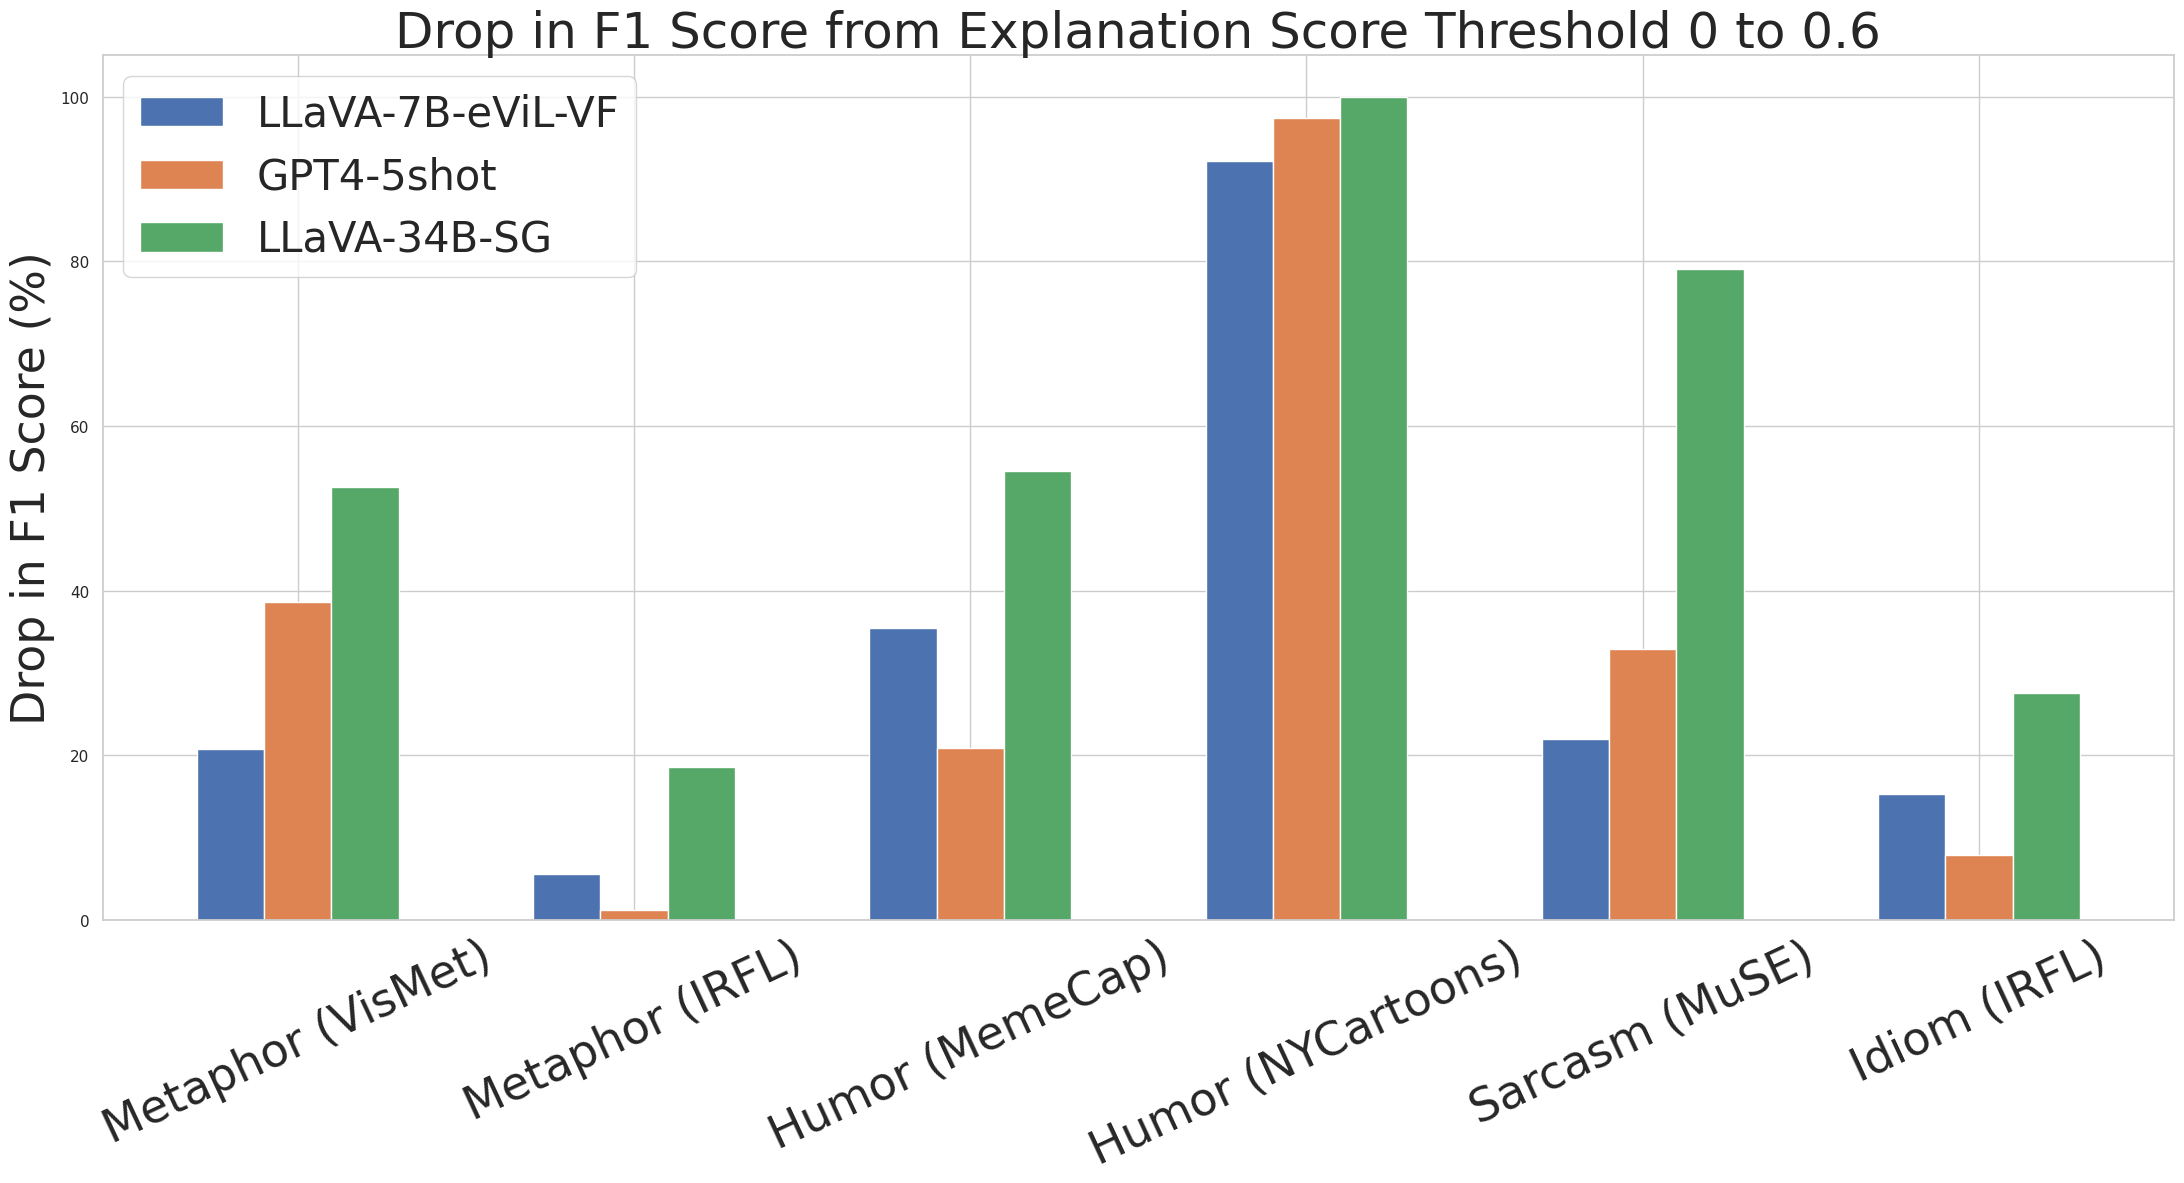

In [11]:
# Function to calculate drop between specified thresholds
# datasets = ft_vflute['dataset'].unique()
# datasets = ['overall', 'vismet', 'irfl_metaphor_simile',
#              'memecap',  'nycartoons', 'muse','irfl_idiom' ]
datasets = [ 'vismet', 'irfl_metaphor_simile',
             'memecap',  'nycartoons', 'muse','irfl_idiom' ]
dataset_to_phen_map = {"memecap": "Humor (MemeCap)",
                    "nycartoons": "Humor (NYCartoons)",
                    "muse": "Sarcasm (MuSE)",
                    "vismet": "Metaphor (VisMet)",
                    "irfl_metaphor_simile": "Metaphor (IRFL)",
                    "irfl_idiom": "Idiom (IRFL)",
                    "overall": "Overall"}

phenomena = [dataset_to_phen_map[dataset] for dataset in datasets]

def calculate_drop_between_thresholds(df, start_threshold, end_threshold):
    drop_stats = {}
    for dataset in datasets:
        f1_start = df[(df['dataset'] == dataset) & (df['threshold'] == start_threshold)]['f1'].values[0]
        f1_end = df[(df['dataset'] == dataset) & (df['threshold'] == end_threshold)]['f1'].values[0]
        drop_stats[dataset_to_phen_map[dataset]] = (f1_start - f1_end) / f1_start * 100 if f1_start != 0 else 0
        
    return drop_stats

drop_0_to_50_ft_evil_vflute = calculate_drop_between_thresholds(ft_evil_vflute, 0.0, 0.6)
drop_0_to_50_zs34b_sg = calculate_drop_between_thresholds(zs34b_sg, 0.0, 0.6)
drop_0_to_50_gp4_fs5 = calculate_drop_between_thresholds(gpt4_fs5, 0.0, 0.6)

# Function to plot grouped bar chart for drops for 4 datasets
def plot_drop_comparison(drop_data_1, drop_data_2, 
                        drop_data_3,
                        title):
    import matplotlib.pyplot as plt
import numpy as np

def plot_drop_comparison(drop_data_1, drop_data_2, drop_data_3, title):
    # Names of the phenomena
    labels = list(drop_data_1.keys())
    
    # Data from the dictionaries
    data1 = list(drop_data_1.values())
    data2 = list(drop_data_2.values())
    data3 = list(drop_data_3.values())
    
    # Setting the positions and width for the bars
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(22, 12))
    rects1 = ax.bar(x - width, data1, width, label='LLaVA-7B-eViL-VF')
    rects2 = ax.bar(x, data3, width, label='GPT4-5shot')
    rects3 = ax.bar(x + width, data2, width, label='LLaVA-34B-SG')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fsize = 30
    ax.set_ylabel('Drop in F1 Score (%)', fontsize=fsize*1.1)
    ax.set_title(title, fontsize=fsize*1.2)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=25, ha='center', fontsize=fsize*1.1)
    ax.legend(fontsize=fsize, loc="upper left")

    # # Function to attach a text label above each bar, displaying its height.
    # def autolabel(rects):
    #     for rect in rects:
    #         height = rect.get_height()
    #         ax.annotate('%.1f%%' % height,
    #                     xy=(rect.get_x() + rect.get_width() / 2, height),
    #                     xytext=(3, 3),  # 3 points vertical offset
    #                     textcoords="offset points",
    #                     ha='center', va='bottom')

    # autolabel(rects1)
    # autolabel(rects2)
    # autolabel(rects3)

    fig.tight_layout()
    plt.savefig(title + '.pdf', dpi=300)
    plt.show()   
    

plot_drop_comparison(drop_0_to_50_ft_evil_vflute, drop_0_to_50_zs34b_sg, drop_0_to_50_gp4_fs5,
                    "Drop in F1 Score from Explanation Score Threshold 0 to 0.6")

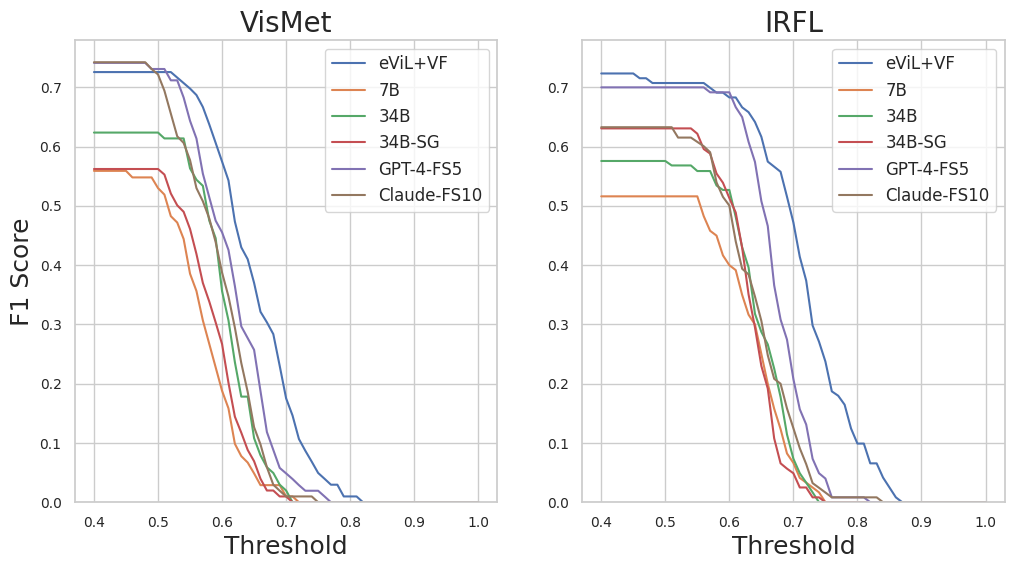

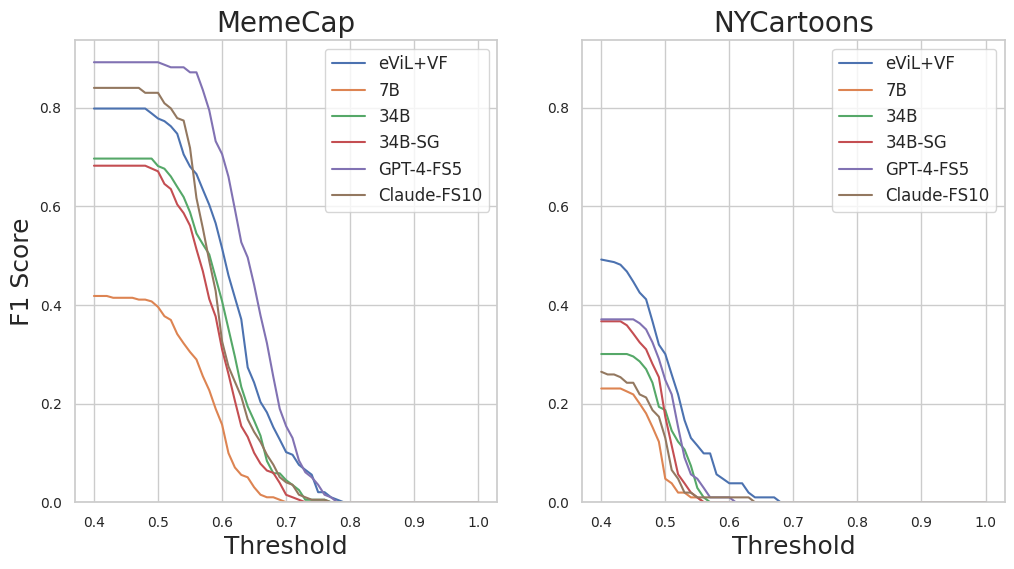

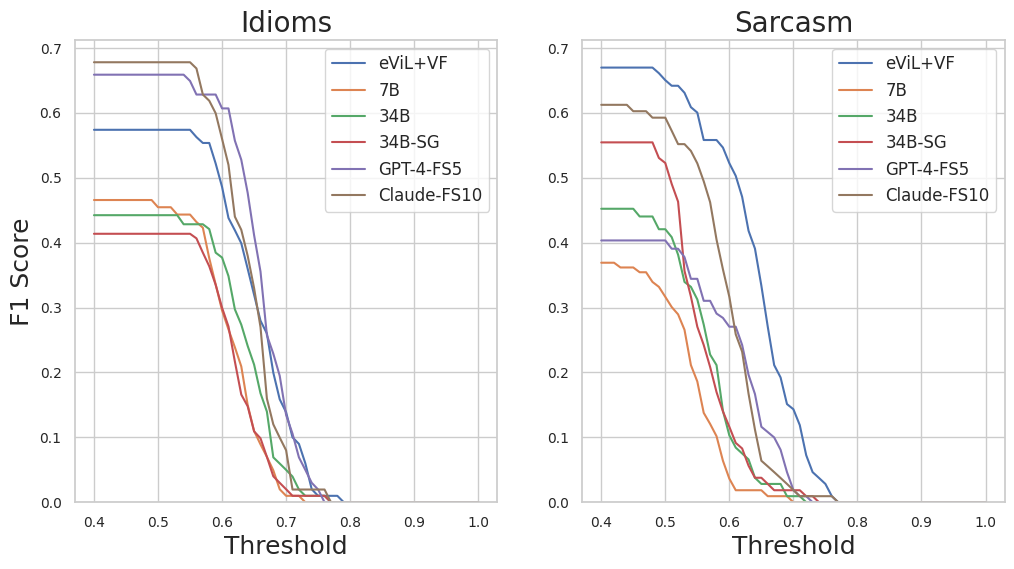

In [12]:
# Adjust the creation of plots to ensure the top line of the plot is clearly visible by adjusting the Y-axis limit slightly above the maximum F1 score

# Adjust the plot creation to display the legend only on the first plot, above both subplots.
# data = overall_df_viz[(overall_df_viz['threshold']>=0.4) 
#                     & (overall_df_viz['threshold']<=0.6)]
data = overall_df_viz[(overall_df_viz['threshold']>=0.4) 
                    ]
def create_final_plots(datasets, title, subplot_titles, firstPlot=False):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    # fig.suptitle(title)
    
    # Calculate global F1 score range for consistent y-axis across plots, with a little extra space for clarity at the top
    global_min_f1 = data[data['dataset'].isin(datasets)]['f1'].min()
    global_max_f1 = data[data['dataset'].isin(datasets)]['f1'].max() * 1.05
    
    lines, labels = [], []
    for i, ax in enumerate(axes.flatten()):
        plot_data = data[data['dataset'] == datasets[i]]
        sns_plot = sns.lineplot(x='threshold', y='f1', hue='model_name', data=plot_data, ax=ax, markers=True, dashes=False)
        fsize = 20
        ax.set_title(subplot_titles[i], fontsize=fsize)
        ax.set_xlabel('Threshold', fontsize=fsize-2)
        ax.set_ylabel('F1 Score' if i == 0 else '', fontsize=fsize-2)
        ax.tick_params(labelsize=10) 
        ax.set_ylim(global_min_f1, global_max_f1)
        ax.legend(fontsize=fsize-8)
        # ax.set_xticks([ 0.4, 0.5, 0.6, 0.7, 0.8]) 
        # if i == 0:
        #     ax.set_ylabel('F1 Score')
        # else:
        #     ax.set_ylabel('')
        
        # if i == 0:  # Collect legend info from the first subplot
        #     lines, labels = ax.get_legend_handles_labels()
    
    # Remove legends from subplots
    # for ax in axes.flatten():
    #     ax.legend().remove()
    
    # if firstPlot:
    #     fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=7)
    # fig.legend(lines, labels, loc='upper center', ncol=5, fontsize=fsize-4)
    
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("plots/phenomena/"+title+".pdf", dpi=300)


# Create the adjusted plots with the shared legend
create_final_plots(['vismet', 'irfl_metaphor_simile'], "Metaphors", ["VisMet", "IRFL"], firstPlot=True)
create_final_plots(['memecap', 'nycartoons'], "Humor", ["MemeCap", "NYCartoons"])
create_final_plots([ 'irfl_idiom', 'muse'], "Sarcasm and Idioms", ["Idioms", "Sarcasm"])

plt.show()
